# **Fisher's Iris Dataset**

***

![Iris](https://camo.githubusercontent.com/e7323e044d6625c91a344232b5f5da9127e16e640974fdfd33a52f85fc7dbb2c/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6173736574732e6461746163616d702e636f6d2f626c6f675f6173736574732f4d616368696e652b4c6561726e696e672b522f697269732d6d616368696e656c6561726e696e672e706e67)

This notebook contains my analysis of the Fisher's Iris dataset.

The data set is available [here](https://archive.ics.uci.edu/dataset/53/iris) 

**Author: Brianne McGrath**

***

# **Dataset Overview**

***

The Fisher's Iris dataset is a classic dataset in the field of statistics and machine learning, introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems". It consists of 150 samples of Iris flowers for three species: Setosa, Versicolor, and Virginica. Here is an overview of the dataset: 

#### **Features:** 
The dataset contacts four features measured from each sample: 
1. Sepal Length (CM)
2. Sepal Width (CM)
3. Petal Width (CM)
4. Petal Length (CM)

#### **Size & Quality:** 
The dataset consists of 150 samples, with 50 samples for each species. This dataset is well-known for its high quality and cleanliness, with no missing values or anomalies. 

***

# **Imports** 

***

We use pandas for the DataFrame data structure. We use matplotlib and seaborn for data visualistation. 

In [45]:
#Importing Necessary Libararies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

***

# **Load Data**

***

Load the Fisher's Iris dataset. 

In [46]:
df = pd.read_csv('iris.data')

***

# **Inspection of Data**

***

Inital inspection of dataset. 

In [47]:
#Reviewing Dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
#Spot Checking Data
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
139,6.9,3.1,5.4,2.1,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
64,5.6,2.9,3.6,1.3,Iris-versicolor
149,5.9,3.0,5.1,1.8,Iris-virginica


In [49]:
#Showing Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
#Showing Summary Statistics
df.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
#Are There Any Columns That Have Missing Values?
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [52]:
#Count the Number of Flowers in Each Species
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

***

# **Analysis:**

***

### **Count of Flowers by Species:**

The below shows the distribution of flowers based on their species. We can see that they are all equally represented with 50 readings for each. 

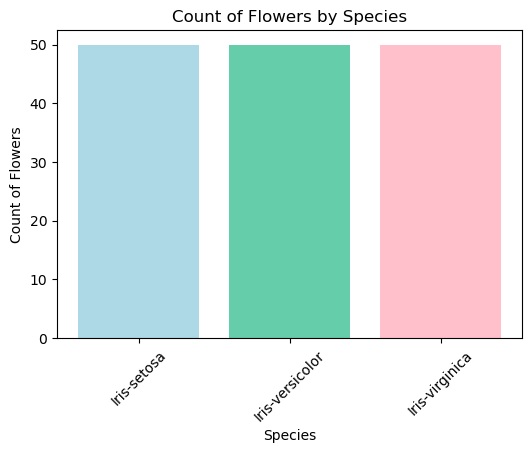

In [53]:
# Count of Flowers by Species
flowers_count_by_species = df['Species'].value_counts()

# Colours for Each Species
colours =['lightblue', 'mediumaquamarine', 'pink']

#Creating Bar Chart
plt.figure(figsize=(6,4))
plt.bar(flowers_count_by_species.index, flowers_count_by_species.values, color=colours)
plt.title('Count of Flowers by Species')
plt.xlabel('Species')
plt.ylabel('Count of Flowers')
plt.xticks(rotation=45)
plt.show()

# **Summary of Each Variable**

***

In [54]:
#Summary of Each Variable - Single Text File: 

#Calculating summary statistics for each variable
summary = df.describe()

#Format the summary information
summary_text = summary.to_string()

#Write the summary to a text file
with open("variable_summary.txt", "w") as file:
    file.write(summary_text)
print("Summary of variables written to 'variable_summary.txt' file.")

Summary of variables written to 'variable_summary.txt' file.


# **Histogram of Each Variable**

***

In [55]:
#Defining the output folder for histograms
output_folder = 'histograms'

def save_histograms(df, output_folder):

    #Defining colours for each Histogram
    colours = ['mediumaquamarine', 'pink', 'lightblue', 'mediumorchid']

    #Loop through each column in the dataset
    for column in df.columns: 
        #Create a histogram for the varibale and save it is a PNG file
        df[column].plot(kind='hist', bins=10, color=colours[i % len(colours)]) #Not showing in the folder? REVIEW!!
        plt.title(f'Histograms of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True) #Not showing either?
        plt.savefig(f'{output_folder}/{column}_histogram.png')
        plt.close()
print("Histograms of variables output to 'histograms' file.")


Histograms of variables output to 'histograms' file.


# **Scatter Plot of Each Variable**

***

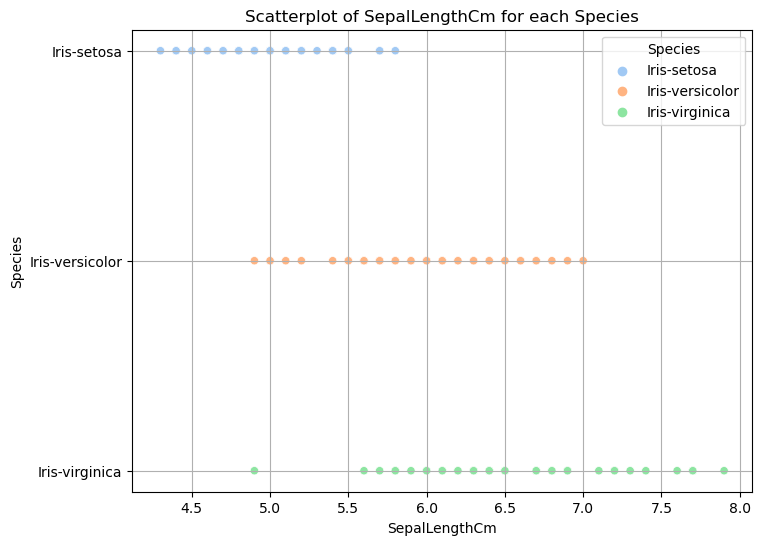

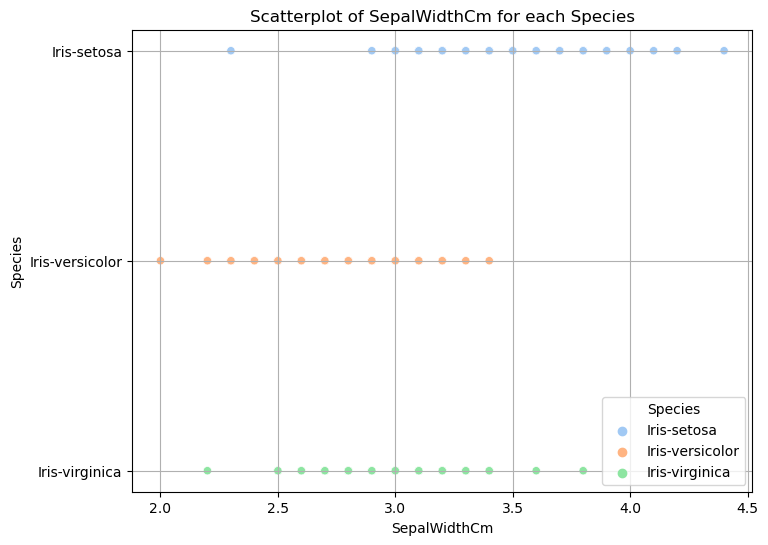

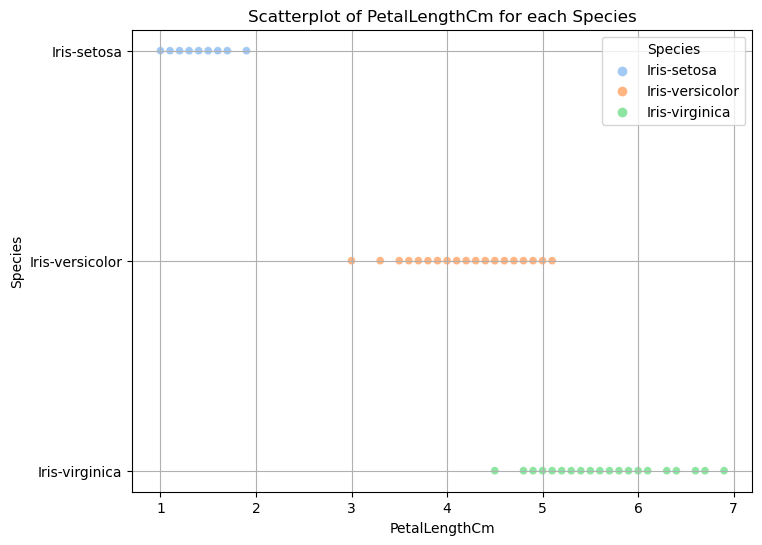

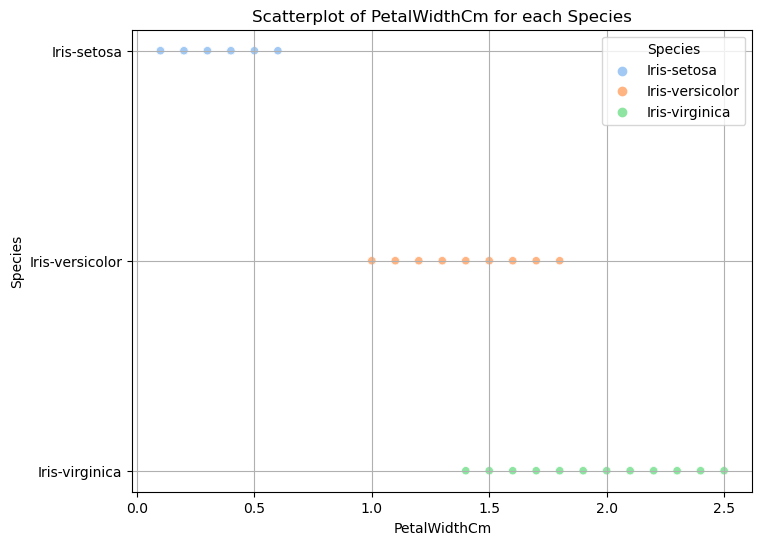

In [56]:
#Scatter Plot for Each Variable

for column in df.columns[:-1]: #Species Column Excluded
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=column, y='Species', hue='Species', palette='pastel')
    plt.title(f"Scatterplot of {column} for each Species")
    plt.xlabel(column)
    plt.ylabel("Species")
    plt.grid() #Maybe adjust linestyle - review this
    plt.show()

### **Summary of Scatterplots:**

- **Iris Setosa:** Typically exhibits the shortest sepal lengths. They tends to have the widest sepal widths, occasionally with some outliers. Petal lengths are relatively short, ranging between approximately 1-2cm, and they usually have the smallest petal width among the three species.

- **Iris Versicolor:** Shows intermediate values for sepal length, intersecting with both other species in terms of length. They tends to have the narrowest sepal widths among the three species. For petal measurements, they usually fall in the middle range, with some overlap with Iris Virginica for petal length and width.

- **Iris Virginica:** Typically displays the largest measurements for all variables. Notably, the readings for sepal widths is quite varied.

In terms of pattern recognition and classification tasks here is an insight based on the brief analysis above: 

- **Overlapping Features:** Identifying areas of overlap between species in features shows a potential challenge for classification. For example, the slight crossover in Sepal Length and Petal measurements between Iris Versicolor and Iris Virginica suggests that distingushing between these two species may require a deeper analysis. This is noted in many references previously and is clear to see from above. 

***

# **Correlation Analysis: Examining Relationship Between Variables**

***

Our aim in this section is to determine if there is any correlation between two sets of variables. Of course, correlation does not imply causation but it may be interesting to see how each species characteristics are correlated. 

### **Pairplot:**

Let's start by reviewing a pairplot to determine correlation between variables.

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


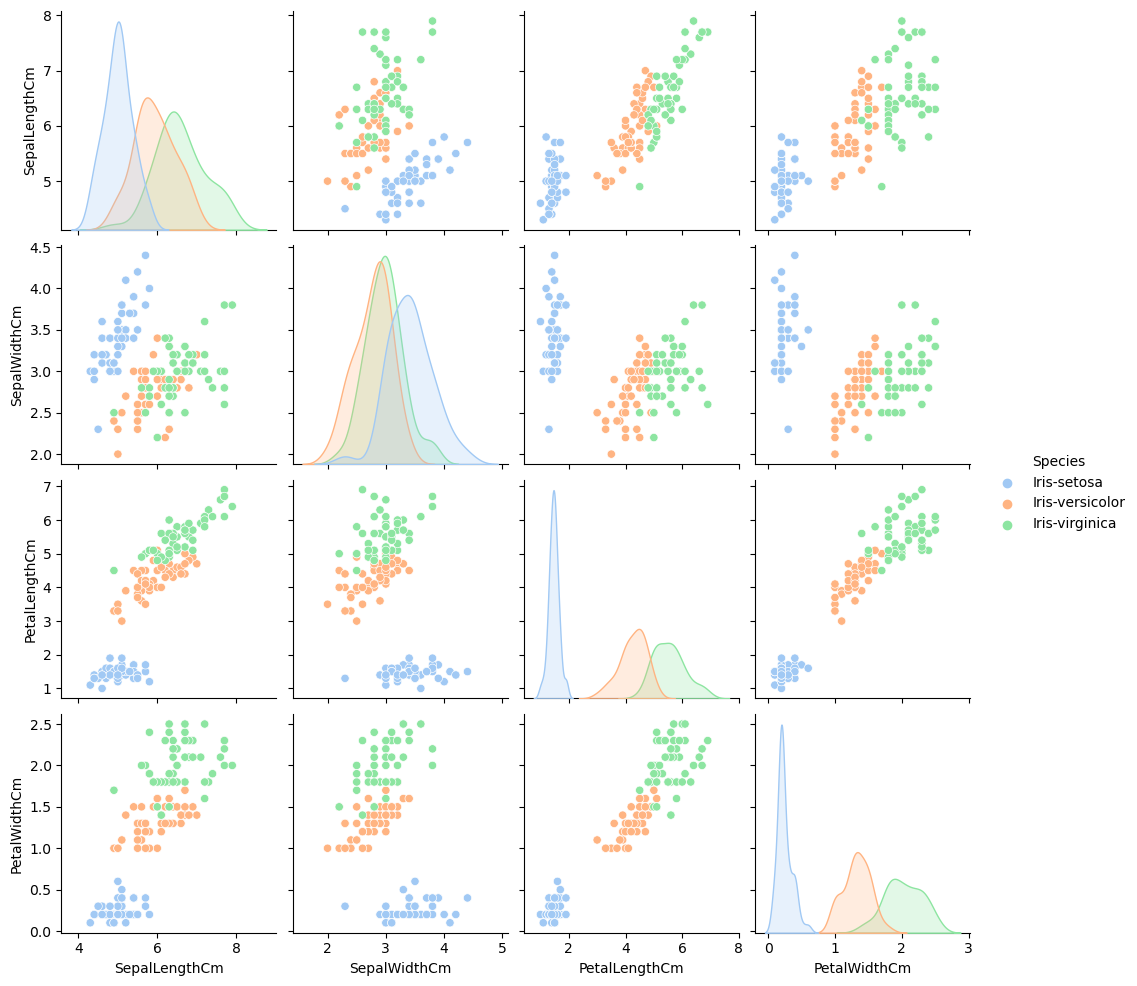

In [57]:
#Creating a Pairplot
sns.pairplot(df, hue='Species', palette='pastel')
plt.show()

Our analysis reveals a considerable overlap in measurements between Iris Versicolor and Iris Virginica. This overlaps poses a potential challenge in distinguising between these two species solely based on their characteristics. 

### **Boxplots:** 

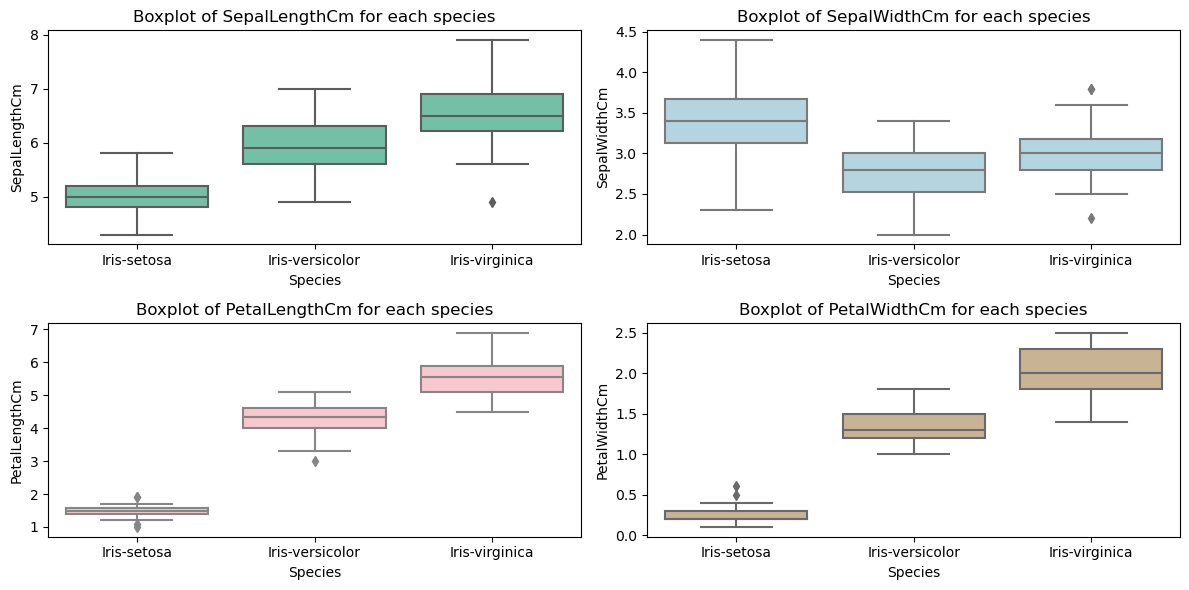

In [65]:
# Boxplot for each variable
plt.figure(figsize=(12, 6))

#Defining Colours 
colours=['mediumaquamarine', 'lightblue', 'pink', 'tan'] 
for i, column in enumerate(df.columns[:-1]):  # Exclude the Species column
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=column, data=df, color=colours[i % len(colours)])
    plt.title(f'Boxplot of {column} for each species')
plt.tight_layout()
plt.show()

#### **Analysis of Boxplot:**

Upon analysing the distribution of Petal Length and Width measurements for Iris Setosa, we observe distinct non-overlapping ranges compared to the other two species. This suggests that Petal Length and Width could serve as effective features for distinguishing between the species. It's reasonable to deduce that an Iris flower with shorter Petal Length and smaller Petal Width is likely to belong to the Iris Setosa species. Additionally, our analysis indicated that Iris Virginica generally exhibits larger measurements across most characteristics, with the only exception being Sepal Width.

### **Scatterplot:** **Petal Width vs Petal Length**

We are seeing an extremely strong positive correlation when it comes to Petal Length vs Petal Width. Let's see how that looks per species. 

In [ ]:
#Calculate Pearson correlation coefficient for Iris Setosa
setosa_correlation = df[df['Species'] == 'Iris-setosa']['PetalWidthCm'].corr(df[df['Species'] == 'Iris-setosa']['PetalLengthCm'])

#Calculate Pearson correlation coefficient for Iris Versicolor
versicolor_correlation = df[df['Species'] == 'Iris-versicolor']['PetalWidthCm'].corr(df[df['Species'] == 'Iris-versicolor']['PetalLengthCm'])

#Calculate Pearson correlation coefficient for Iris Virginica
viriginica_correlation = df[df['Species'] == 'Iris-virginica']['PetalWidthCm'].corr(df[df['Species'] == 'Iris-virginica']['PetalLengthCm'])


#Print the correlation coefficients for Petal Width vs Petal Length
print("Pearson correlation coefficient for Petal Width vs Petal Length - Iris Setosa:", setosa_correlation)
print("Pearson correlation coefficient for Petal Width vs Petal Length - Iris Versicolor:", versicolor_correlation)
print("Pearson correlation coefficient for Petal Width vs Petal Length - Iris Virginica:", viriginica_correlation)

Pearson correlation coefficient for Petal Width vs Petal Length - Iris Setosa: 0.3063082111580356
Pearson correlation coefficient for Petal Width vs Petal Length - Iris Versicolor: 0.7866680885228168
Pearson correlation coefficient for Petal Width vs Petal Length - Iris Virginica: 0.32210821590031835


c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


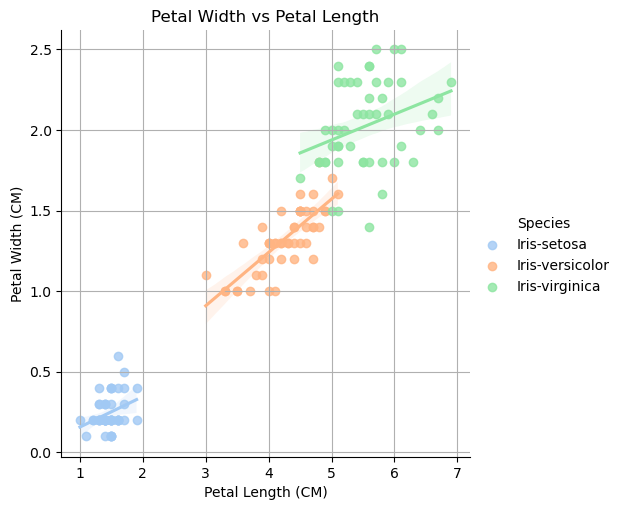

In [ ]:
# lmplot seperated by Species

#Scatter Plots 

sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species', palette='pastel')
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.grid()
plt.show()

Again, we are seeing a positive correlation between Petal Width and Petal Length across our three speices. Iris Versicolor has the strongest correlation (0.787). The correlations between our other two species are weaker. We can see that the points are scattered away from the regression line. This may be due to the fact there is a wider range of readings for these species variables. 

In terms of classifying based species based on Petal Length and Width we can see that the Iris Setosa species is smaller than our two other species. 

***

# **Conclusion:**

***

Our analysis of the Fisher's Iris dataset revealed some interesting insights into the attributes of these specific flower species and their correlations. We looked at three varieties of the Iris species, including Iris Setosa, Iris Versicolor and Iris Virginica with an even distribution of readings across all species. 

Key insights for our analysis include: 

- Predominantly positive correlations in Petal Width and Petal Length across all species. 



***
### End